In [3]:
import pandas as pd
import numpy as np

# Create dummy sales data
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=100, freq="D")
sales = np.random.randint(100, 500, size=(100,))

df = pd.DataFrame({"Date": dates, "Sales": sales})
df.to_csv("sales_data.csv", index=False)

print("Sample Data Created")
df.head()

Sample Data Created


,Date,Sales
0,2023-01-01,202
1,2023-01-02,448
2,2023-01-03,370
3,2023-01-04,206
4,2023-01-05,171


Sales    0
dtype: int64


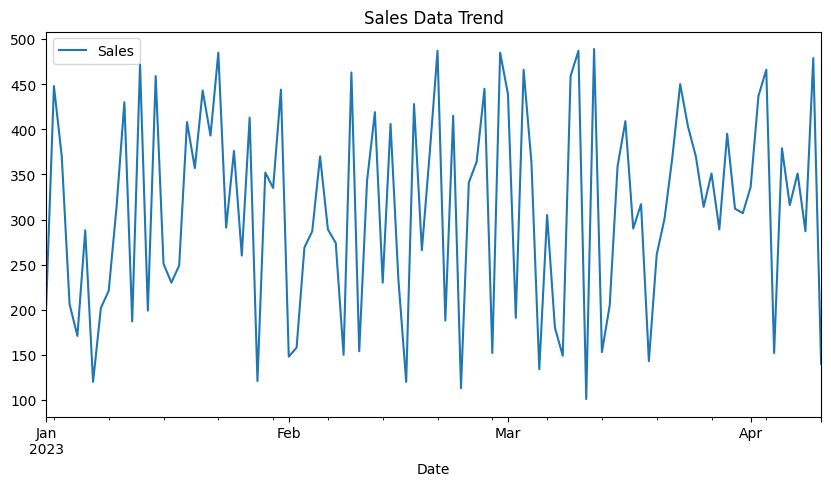

In [4]:
# Load dataset
df = pd.read_csv("sales_data.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Check for missing values
print(df.isnull().sum())

# Plot sales trend
import matplotlib.pyplot as plt
df.plot(figsize=(10,5), title="Sales Data Trend")
plt.show()

Mean Absolute Error: 109.02693699098586


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


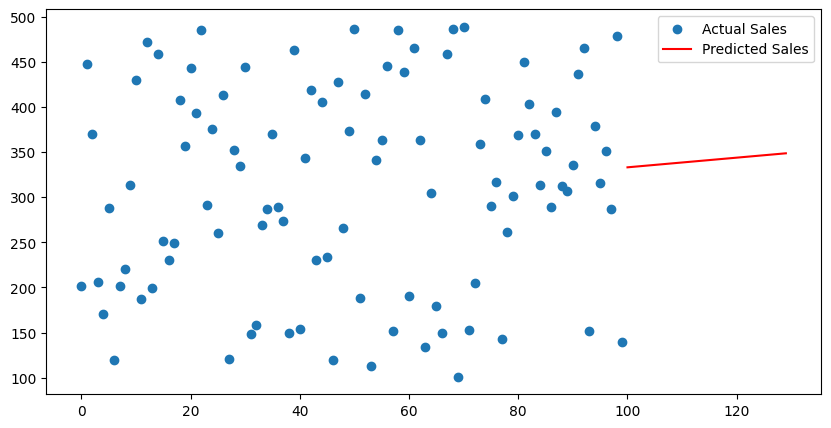

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Convert dates to numeric values for ML
df["Days"] = (df.index - df.index.min()).days

# Train-Test Split
X = df[["Days"]]
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Predict Next 30 Days Sales
future_days = np.array(range(df["Days"].max() + 1, df["Days"].max() + 31)).reshape(-1,1)
future_sales = model.predict(future_days)

# Plot Predictions
plt.figure(figsize=(10,5))
plt.scatter(df["Days"], df["Sales"], label="Actual Sales")
plt.plot(future_days, future_sales, color='red', label="Predicted Sales")
plt.legend()
plt.show()